<a href="https://colab.research.google.com/github/shernee/04_cmpe258/blob/main/3layer_NN_Pytorch_basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from typing import Callable
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import torch
import torch.optim as optim

In [ ]:
# initialize input parameters
n = 150
d = 3

# initialize random input data, weights and bias
x = torch.rand(n, d).float()
weights_true = torch.tensor([[3.0, -2.0, 4.0], ]).T
bias_true = torch.tensor([[1.8]])

print(f'x: {x.shape}, weights: {weights_true.shape}, bias: {bias_true.shape}')

# non-linear equation
y_true = torch.einsum('ij, jk -> ik', (x**3), weights_true) + torch.einsum('ij, jk -> ik', (x**2), weights_true) - torch.einsum('ij, jk -> ik', x, weights_true) + bias_true

print(f'y: {y_true.shape}')

x: torch.Size([150, 3]), weights: torch.Size([3, 1]), bias: torch.Size([1, 1])
y: torch.Size([150, 1])


In [ ]:
# class for our entire non-linear model

class Model(torch.nn.Module):
  def __init__(self, input_dim: int, hidden_dim: int, output_dim: int = 1):
    super().__init__()
    self.w1 = torch.nn.Parameter(torch.randn(input_dim, hidden_dim), requires_grad=True)
    self.b1 = torch.nn.Parameter(torch.randn(hidden_dim), requires_grad=True)
    self.w2 = torch.nn.Parameter(torch.randn(hidden_dim, hidden_dim), requires_grad=True)
    self.b2 = torch.nn.Parameter(torch.randn(hidden_dim), requires_grad=True)
    self.w3 = torch.nn.Parameter(torch.randn(hidden_dim, output_dim), requires_grad=True)
    self.b3 = torch.nn.Parameter(torch.randn(output_dim), requires_grad=True)

  def forward(self, x):
    r1 = torch.relu(torch.matmul(x, self.w1) + self.b1)
    r2 = torch.relu(torch.matmul(r1, self.w2) + self.b2)
    y_predicted = torch.matmul(r2, self.w3) + self.b3
    return y_predicted

In [ ]:
# initialize model parameters
input_dim = d
hidden_dim = 10
output_dim = 1
lr = 0.1
num_epochs = 40

model = Model(input_dim=input_dim, hidden_dim=hidden_dim, output_dim=output_dim)
loss = torch.nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=lr)

In [ ]:
for epoch in range(num_epochs):
  optimizer.zero_grad()  
  y_predicted = model(x=x)
  loss_value = loss(y_predicted, y_true)
  print(f'Epoch: {epoch}; Loss Value: {loss_value}')
  loss_value.backward()
  optimizer.step()

Epoch: 0; Loss Value: 6.483119487762451
Epoch: 1; Loss Value: 16.421232223510742
Epoch: 2; Loss Value: 3.881293535232544
Epoch: 3; Loss Value: 10.839807510375977
Epoch: 4; Loss Value: 5.317859172821045
Epoch: 5; Loss Value: 2.6703803539276123
Epoch: 6; Loss Value: 4.1440911293029785
Epoch: 7; Loss Value: 4.97949743270874
Epoch: 8; Loss Value: 4.409204483032227
Epoch: 9; Loss Value: 3.3807754516601562
Epoch: 10; Loss Value: 2.793181896209717
Epoch: 11; Loss Value: 2.9135279655456543
Epoch: 12; Loss Value: 3.352276086807251
Epoch: 13; Loss Value: 3.527324676513672
Epoch: 14; Loss Value: 3.2199866771698
Epoch: 15; Loss Value: 2.6808013916015625
Epoch: 16; Loss Value: 2.275524139404297
Epoch: 17; Loss Value: 2.1457676887512207
Epoch: 18; Loss Value: 2.1894655227661133
Epoch: 19; Loss Value: 2.17718243598938
Epoch: 20; Loss Value: 1.9802559614181519
Epoch: 21; Loss Value: 1.6575714349746704
Epoch: 22; Loss Value: 1.4332914352416992
Epoch: 23; Loss Value: 1.4885152578353882
Epoch: 24; Loss V

In [ ]:
model = Model(input_dim=input_dim, hidden_dim=hidden_dim, output_dim=output_dim)
loss = torch.nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=lr)

# Train model - one forward and one backward pass for visualization
optimizer.zero_grad() 
# forward
y_predicted = model(x)
loss_value = loss(y_predicted, y_true)
print(f'Loss Value: {loss_value}')
# backward
loss_value.backward()
optimizer.step()
# forward
y_pred = model(x)
loss_value = loss(y_predicted, y_true)
print(f'Loss Value: {loss_value}')

Loss Value: 11.029438018798828
Loss Value: 11.029438018798828


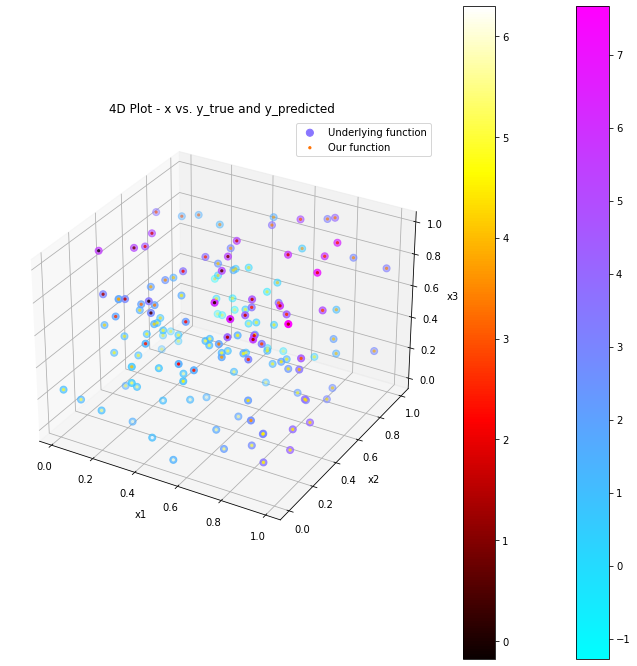

In [ ]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')
scatter_fig = ax.scatter(x[:, 0], x[:, 1], x[:, 2], c=y_true, cmap='cool', label='Underlying function', s=50)
fig.colorbar(scatter_fig)
scatter_fig = ax.scatter(x[:, 0], x[:, 1], x[:, 2], c=y_predicted.detach().numpy(), cmap='hot', label='Our function', marker='.')
fig.colorbar(scatter_fig)

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('x3')
ax.set_title('4D Plot - x vs. y_true and y_predicted')

plt.legend()
plt.show()